# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from pylab import rcParams

In [2]:
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
#  to remove rows and columns with Null/NaN values.
df=df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [4]:
df.shape

(3656, 16)

# Exploratory Data analysis

In [6]:
df.groupby("POSSIBILITY OF CVD").mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
POSSIBILITY OF CVD,,,,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,82.148919,25.642975,75.626331,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,87.157989,26.569838,76.310592,88.732496


In [7]:
df.groupby("male").mean()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
male,,,,,,,,,,,,,,,
0,49.743854,1.963618,0.396755,5.497050,0.038348,0.005900,0.311209,0.025074,239.638151,133.265241,82.360619,25.519651,76.960177,81.791052,0.122911
1,49.323674,2.000000,0.604809,13.442663,0.020345,0.005549,0.311961,0.029593,233.405672,131.242910,83.603576,26.115912,74.188656,81.937731,0.189273


In [8]:
df.groupby("currentSmoker").mean()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
currentSmoker,,,,,,,,,,,,,,,
0,0.343148,51.323340,1.954497,0.000000,0.039079,0.008565,0.360278,0.033726,239.078158,135.271949,84.267934,26.418865,75.139186,83.103854,0.145610
1,0.548658,47.712528,2.006152,18.447987,0.021253,0.002796,0.260626,0.020134,234.569351,129.334172,81.495526,25.121107,76.348434,80.552573,0.159396


In [9]:
df.groupby("prevalentStroke").mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
prevalentStroke,,,,,,,,,,,,,,,
0,0.443741,49.524347,1.982118,0.490509,9.055021,0.028886,0.309216,0.026960,236.830536,132.265475,82.861210,25.772913,75.746080,81.826960,0.151032
1,0.428571,55.285714,1.571429,0.238095,3.333333,0.285714,0.714286,0.047619,244.238095,150.119048,91.714286,27.735238,73.047619,86.904762,0.380952


In [10]:
df.groupby("prevalentHyp").mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
prevalentHyp,,,,,,,,,,,,,,,
0,0.443385,47.791418,2.034168,0.525228,9.582439,0.000000,0.002384,0.018276,231.917759,121.999205,77.937426,24.955781,74.543107,80.454907,0.108462
1,0.444249,53.460053,1.859526,0.409131,7.784021,0.097454,0.013169,0.046532,247.823529,155.281387,93.905180,27.614820,78.354697,84.952590,0.249342


In [11]:
df.groupby("diabetes").mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
diabetes,,,,,,,,,,,,,,,
0,0.442508,49.401743,1.986505,0.492550,9.095586,0.028957,0.005623,0.305313,236.517290,131.990020,82.810655,25.723843,75.608659,79.403992,0.146753
1,0.484848,55.151515,1.737374,0.363636,6.383838,0.080808,0.010101,0.535354,249.656566,145.949495,86.555556,27.952222,80.111111,169.959596,0.353535


### gender wise analysis of CVD:-

In [24]:
data=df.values #converting DataFrame object into np array object
print(data)
male_cvd=female_cvd=female_nocvd=male_nocvd=0
m=len(data) # m= 3656
for i in range(m):
    gen,cvd=data[i][0],data[i][-1]
    if(gen==1):
        if(cvd==1):
            male_cvd+=1
        else:
            male_nocvd+=1
    else:
        if(cvd==1):
            female_cvd+=1
        else:
            female_nocvd+=1
l=[[male_cvd,male_nocvd,male_cvd+male_nocvd],[female_cvd,female_nocvd,female_cvd+female_nocvd],[male_cvd+female_cvd,male_nocvd+female_nocvd]]
genDistribution=pd.DataFrame(data=l,columns=["have CVD","not having CVD","Total of each Gender"],index=["Male","Female","Total"])
display(genDistribution)
        

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  1.  50.   1. ...  66.  86.   1.]
 [  1.  51.   3. ...  65.  68.   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


,have CVD,not having CVD,Total of each Gender
Male,307,1315,1622.0
Female,250,1784,2034.0
Total,557,3099,NaN


# Data Visualisation

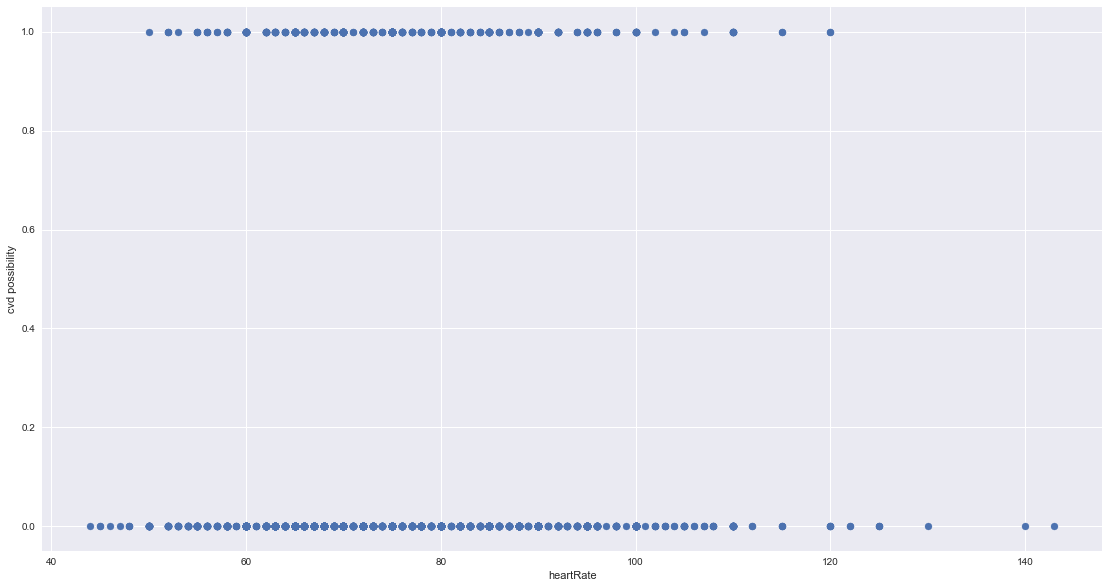

In [25]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["heartRate"],df["POSSIBILITY OF CVD"])
plt.xlabel("heartRate")
plt.ylabel("cvd possibility")

plt.show()

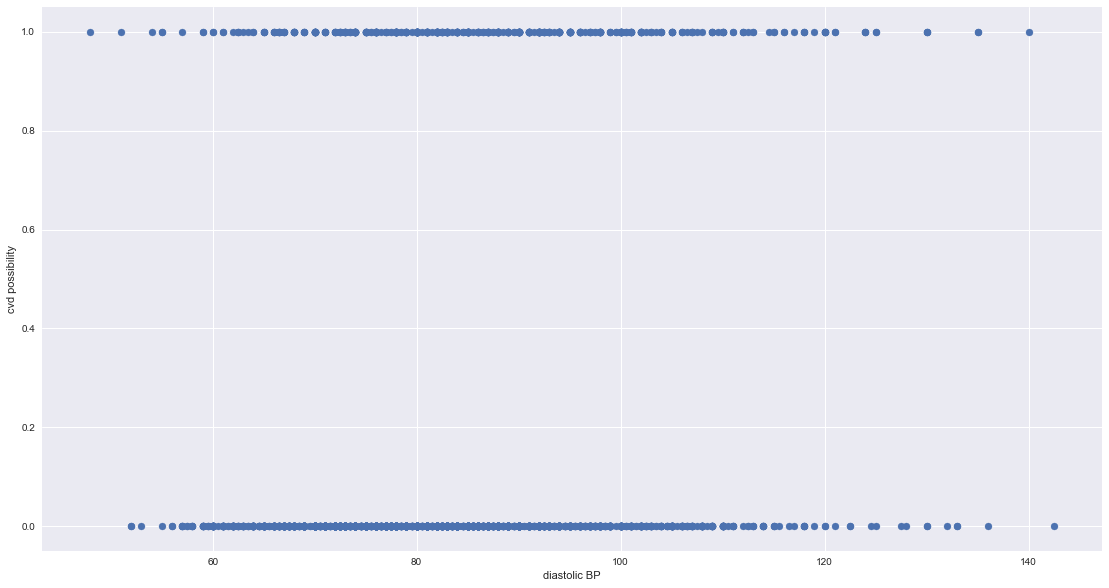

In [26]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["diaBP"],df["POSSIBILITY OF CVD"])
plt.xlabel("diastolic BP")
plt.ylabel("cvd possibility")

plt.show()

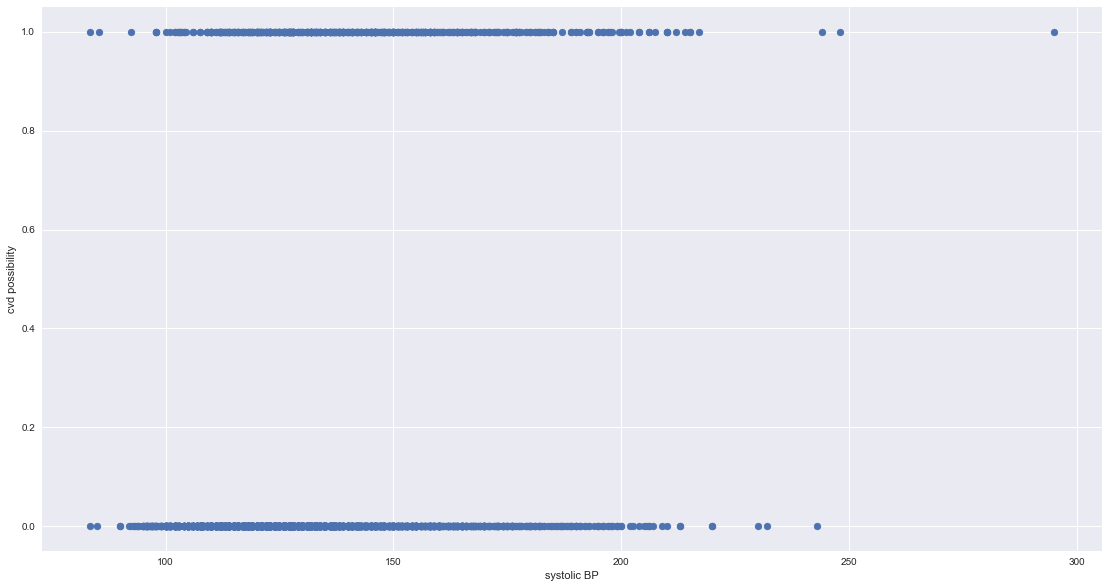

In [27]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["sysBP"],df["POSSIBILITY OF CVD"])
plt.xlabel("systolic BP")
plt.ylabel("cvd possibility")

plt.show()

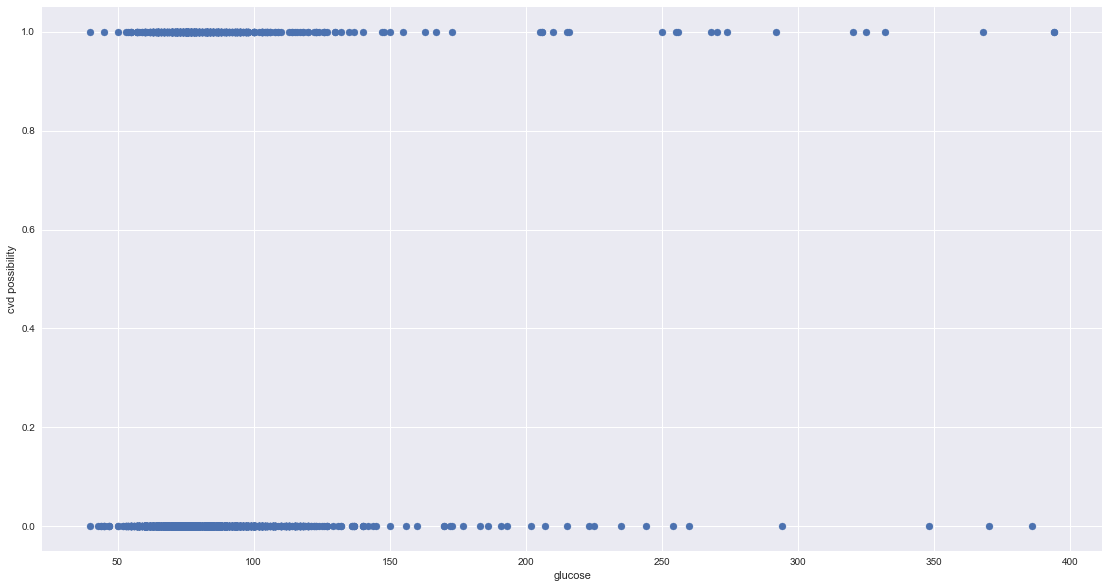

In [28]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["glucose"],df["POSSIBILITY OF CVD"])
plt.xlabel("glucose")
plt.ylabel("cvd possibility")

plt.show()

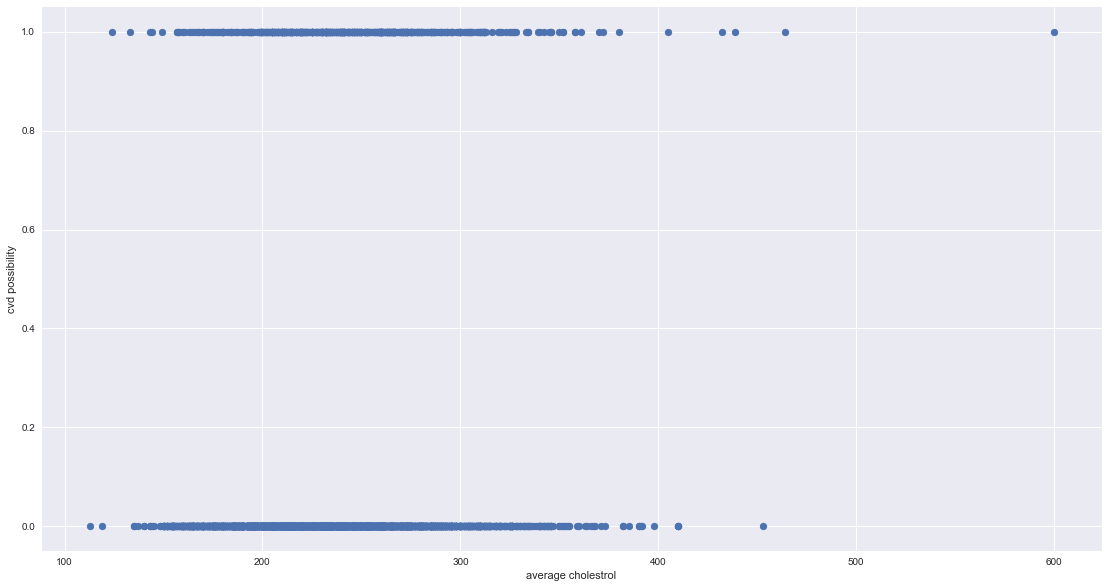

In [29]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["totChol"],df["POSSIBILITY OF CVD"])
plt.xlabel("average cholestrol ")
plt.ylabel("cvd possibility")

plt.show()

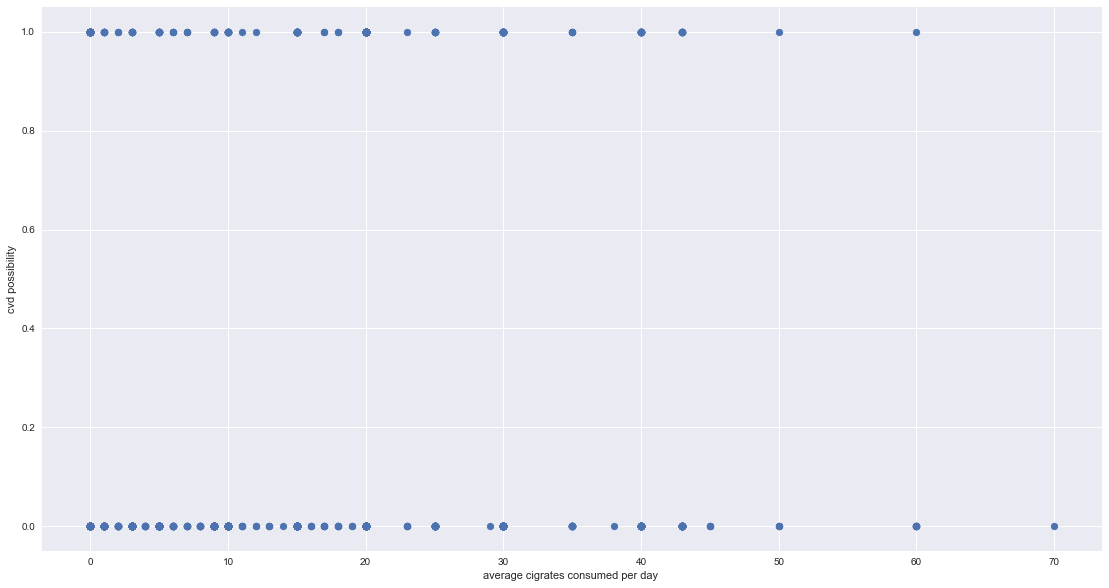

In [30]:

plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["cigsPerDay"],df["POSSIBILITY OF CVD"])
plt.xlabel("average cigrates consumed per day ")
plt.ylabel("cvd possibility")

plt.show()

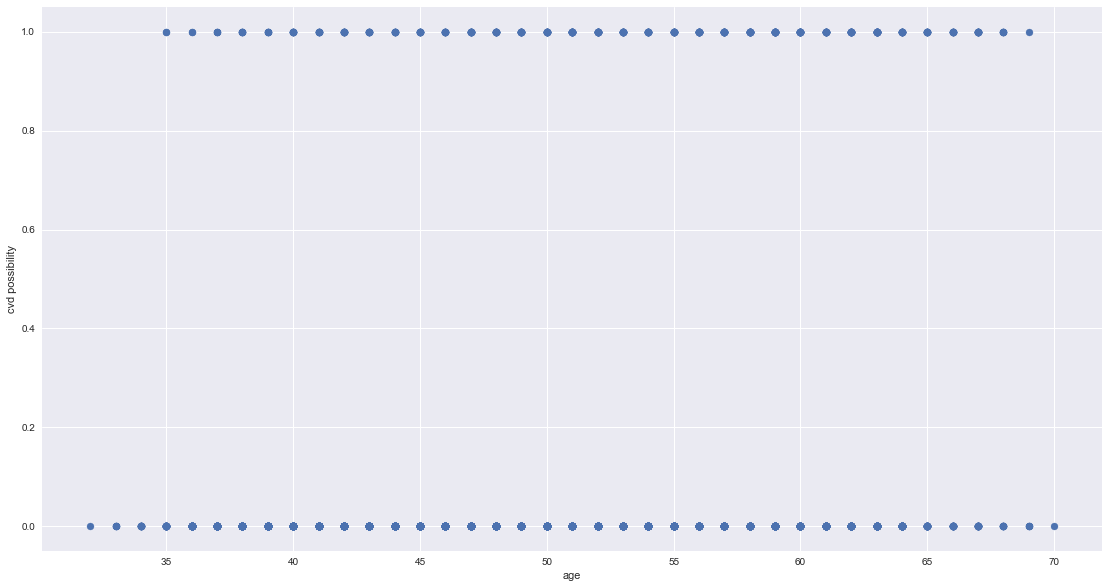

In [31]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["age"],df["POSSIBILITY OF CVD"])
plt.xlabel("age")
plt.ylabel("cvd possibility")

plt.show()

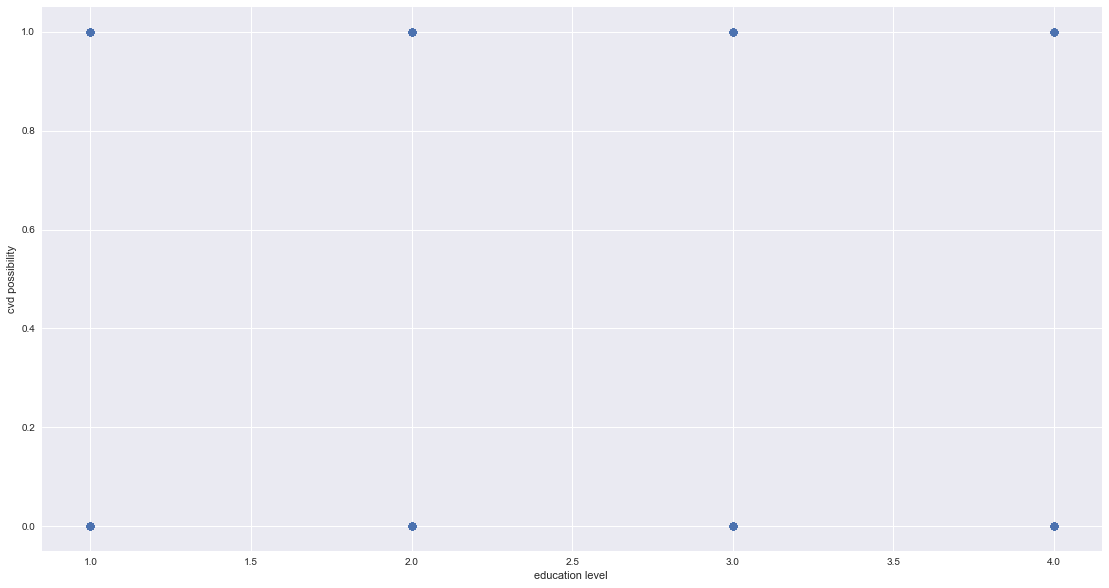

In [32]:
plt.style.use("seaborn")
plt.figure(figsize=(19,10))
plt.scatter(df["education"],df["POSSIBILITY OF CVD"])
plt.xlabel("education level ")
plt.ylabel("cvd possibility")

plt.show()

# Finding Means to predict the result of t-test

In [5]:

%matplotlib inline
rcParams['figure.figsize'] = 25,10
rcParams['font.size'] = 30
sns.set()
#np.random.seed(8)

In [6]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    plt.axvline(np.min(inp), color="green", linestyle="dashed", linewidth=1)
    plt.axvline(np.max(inp), color="red", linestyle="dashed", linewidth=1)
    
    _, max_ = plt.ylim()
    plt.text(
        inp.mean(),
        max_ - max_ / 11,
        "Mean: {:.2f}".format(inp.mean()),
    )
    plt.text(
        inp.mean(),
        (max_ - max_ / 8),
        "std deviation: {:.2f}".format(inp.std()),
    )
    plt.text(
        inp.mean(),
        (max_ - max_ / 5),
        "variance: {:.2f}".format(inp.var()),
    )
    plt.text(
        inp.min(),
        max_ - max_ / 10,
        "Min: {:.2f}".format(inp.min()),
    )
    plt.text(
        inp.max(),
        max_ - max_ / 10,
        "Max: {:.2f}".format(inp.max()),
    )
    
    return plt.figure

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

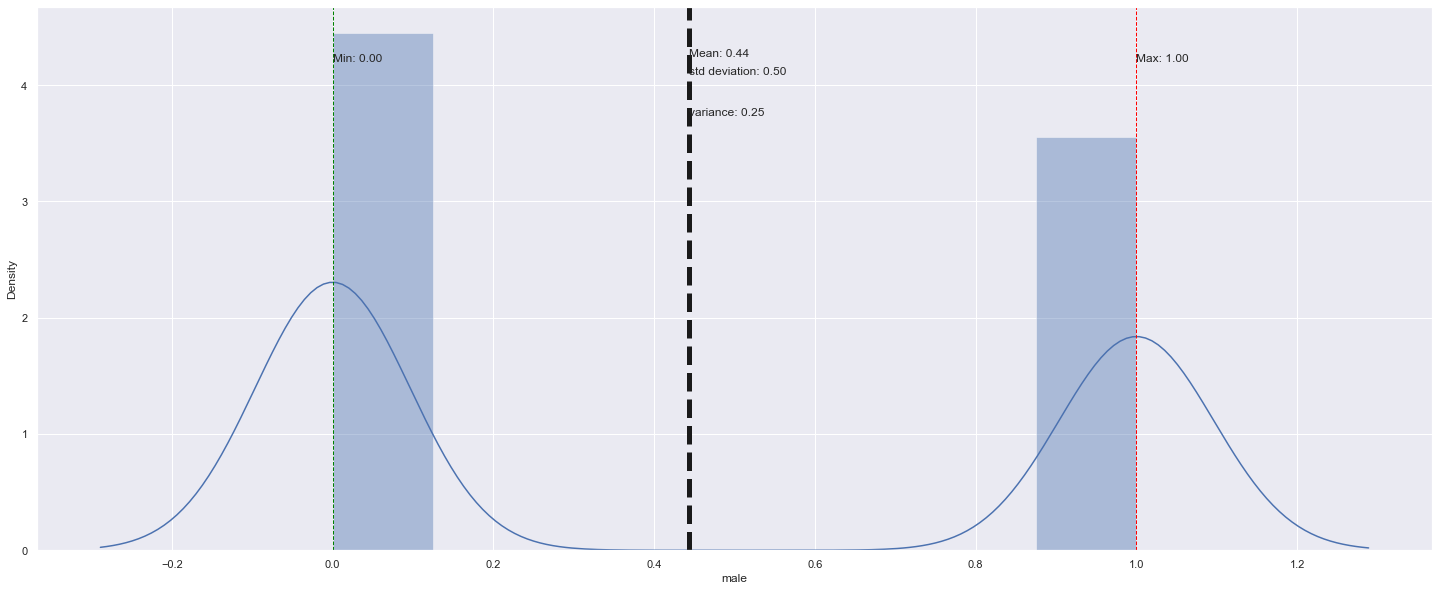

In [7]:
plot_distribution(df["male"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

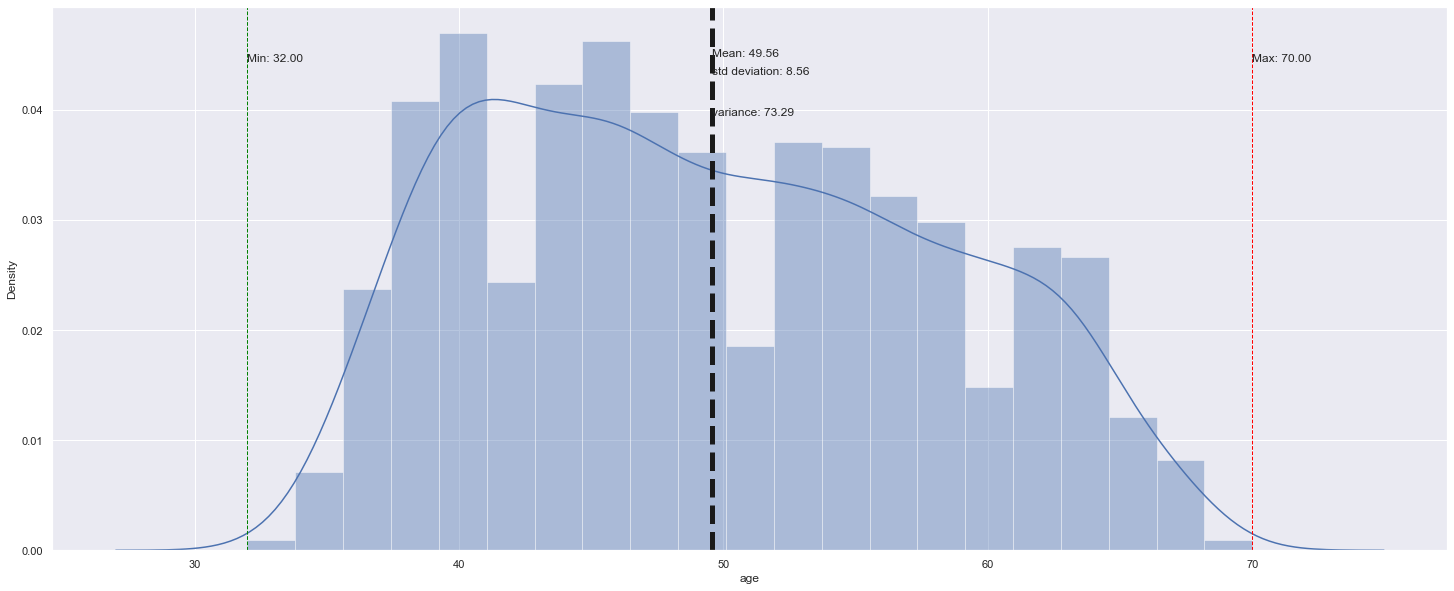

In [8]:
plot_distribution(df["age"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

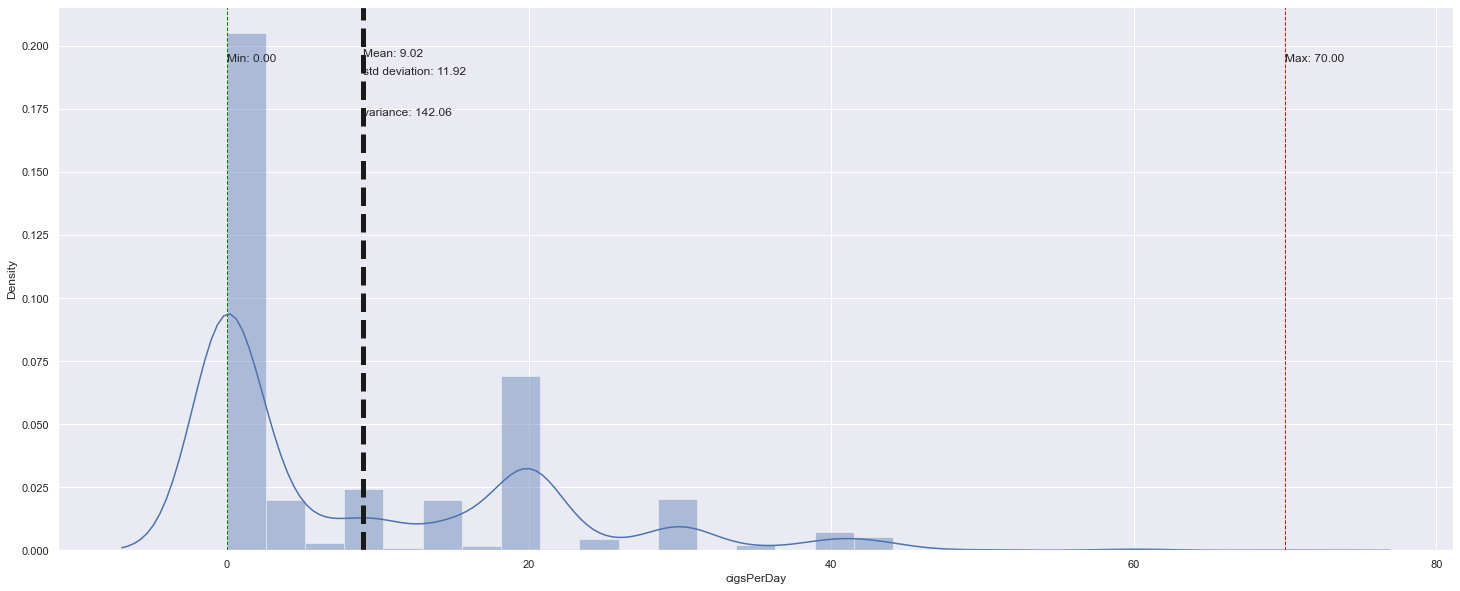

In [9]:
plot_distribution(df["cigsPerDay"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

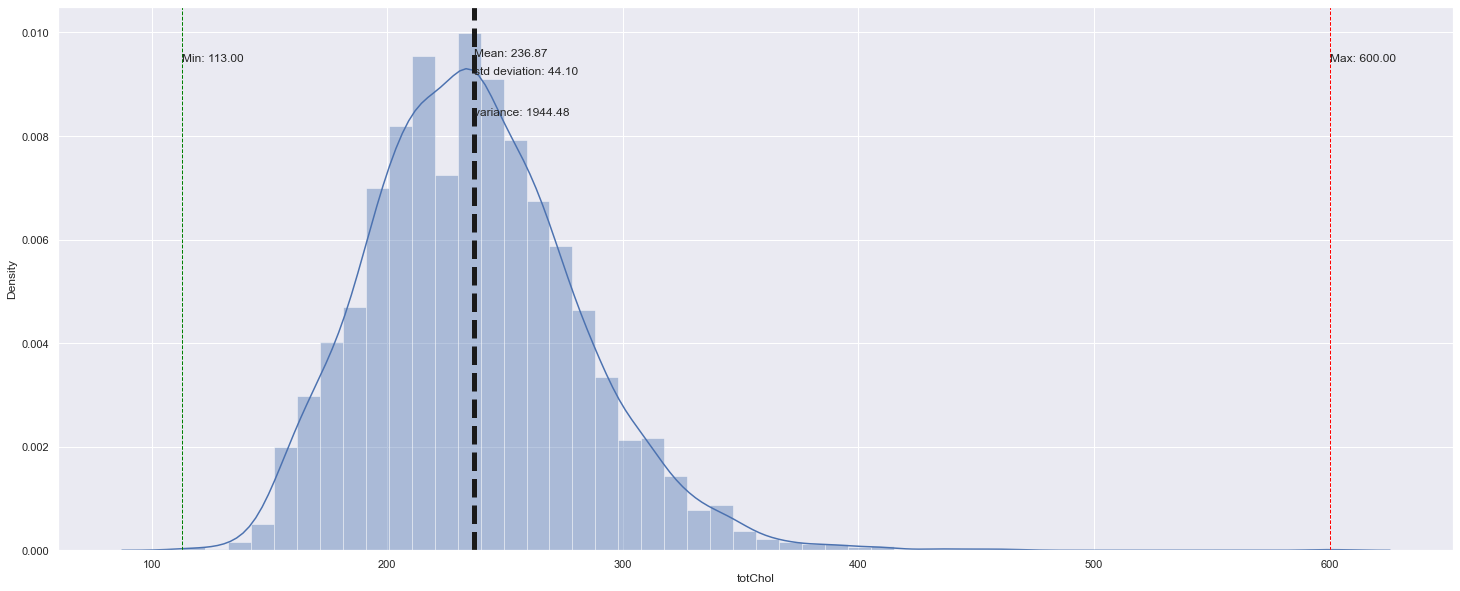

In [10]:
plot_distribution(df["totChol"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

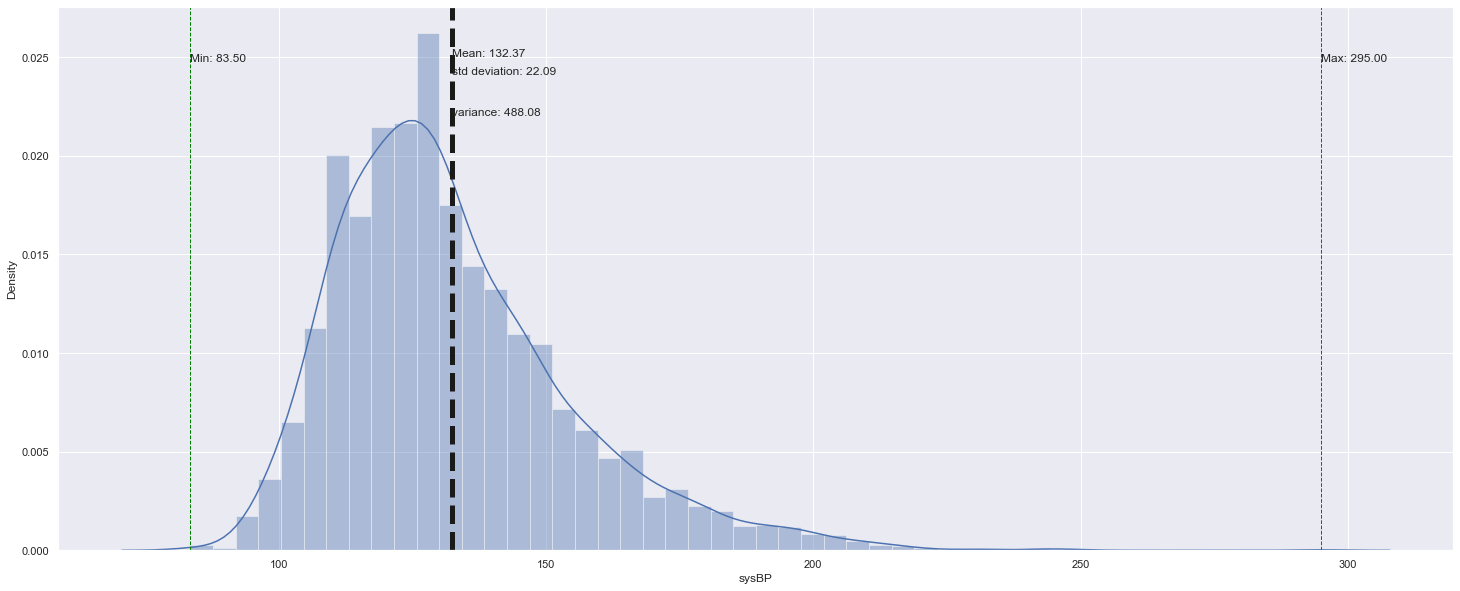

In [11]:
plot_distribution(df["sysBP"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

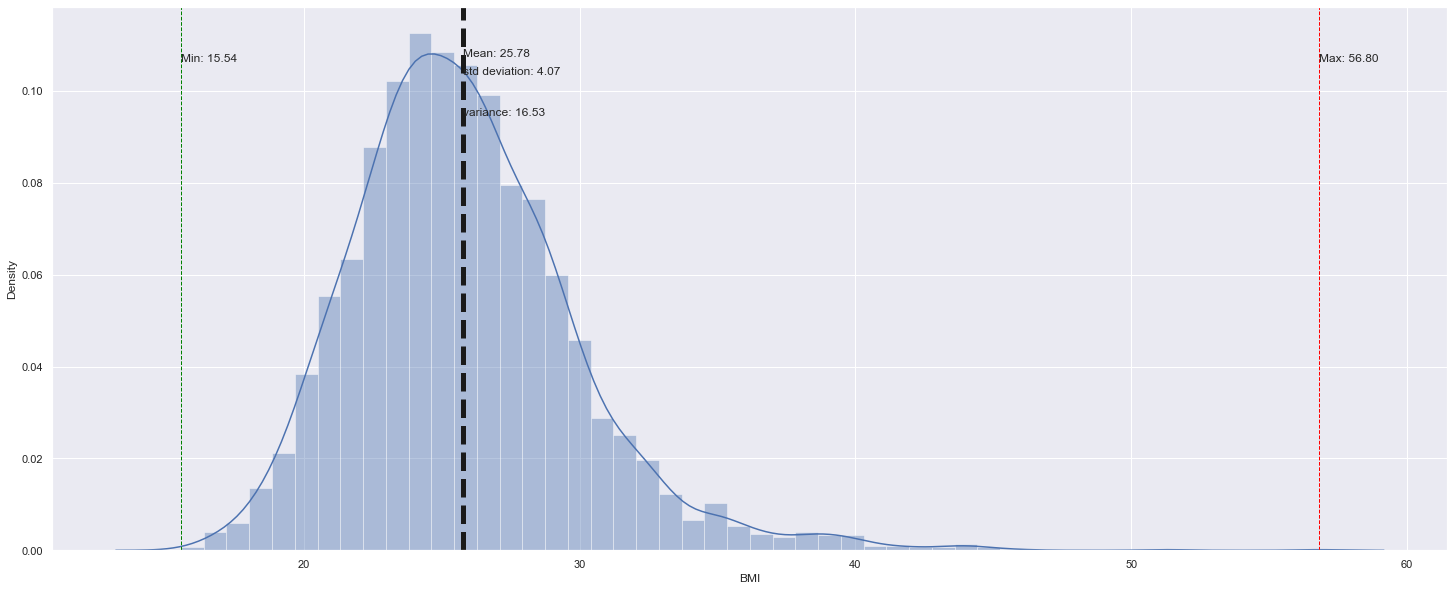

In [12]:
plot_distribution(df["BMI"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

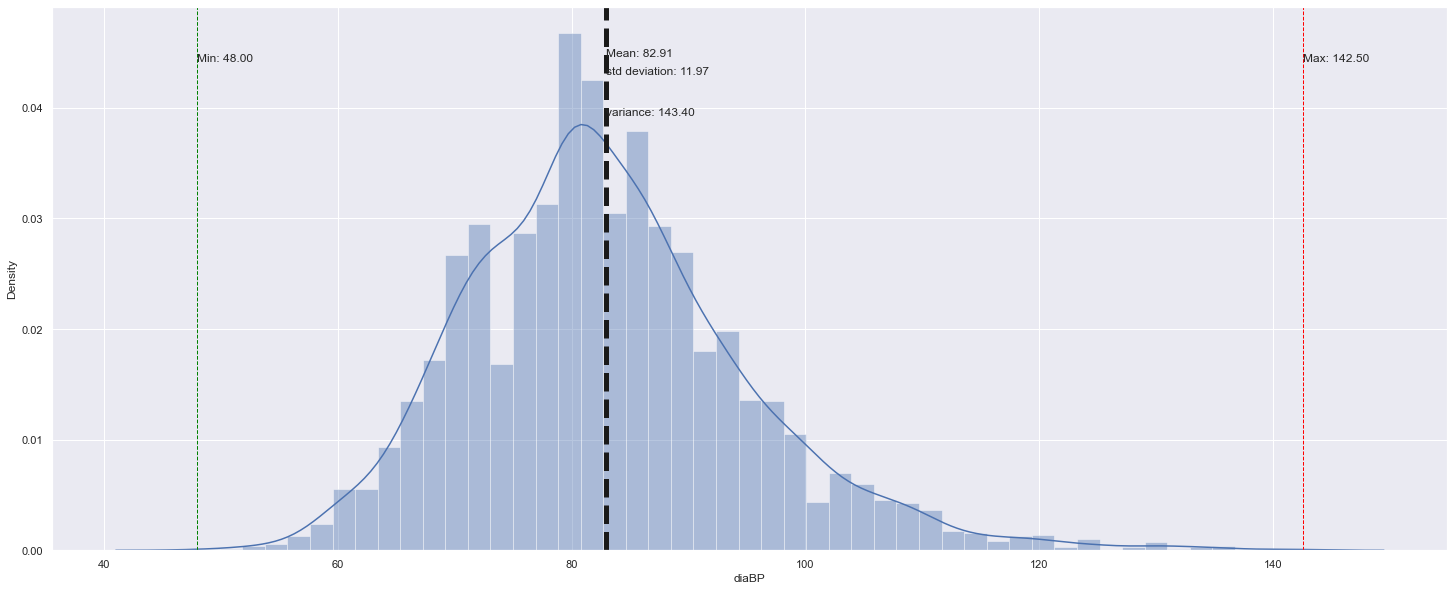

In [13]:
plot_distribution(df["diaBP"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

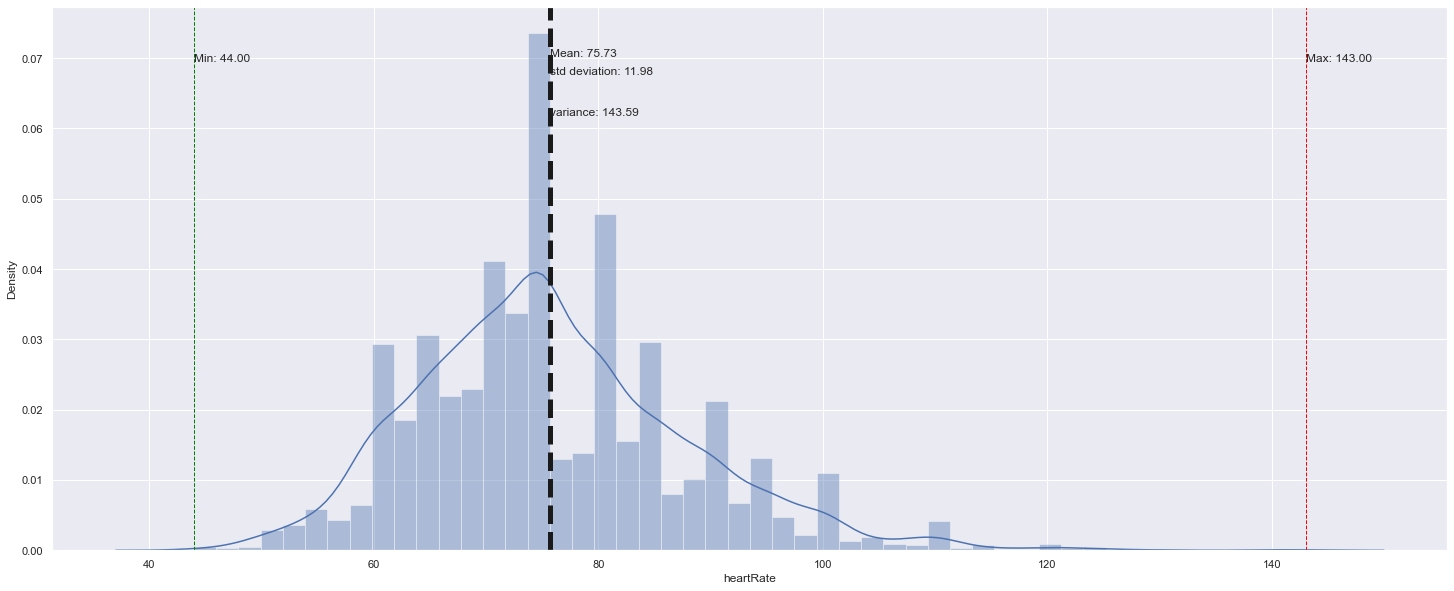

In [14]:
plot_distribution(df["heartRate"])

c:\users\darshan kumar\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

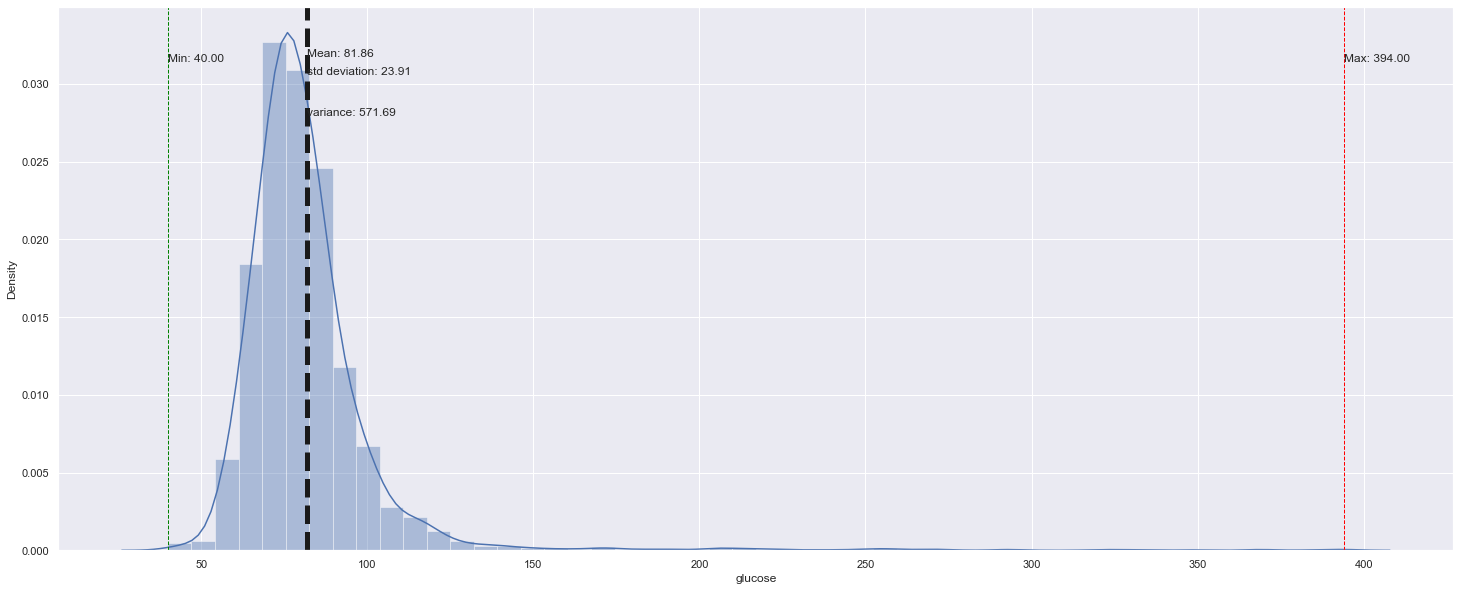

In [15]:
plot_distribution(df["glucose"])

# Performing T Test

In [193]:
# alpha =0.05 is given in base paper
def compare_2_groups(arr_1, arr_2, alpha=0.05):
    stat, p = ttest_ind(arr_1[500:700], arr_2[500:700],equal_var=False)
    print('T Statistics=%.3f, p value=%.3f' % (stat, p))
    if p < alpha:
        print('Statistically Significant')
    else:
        print('Statistically IN-Significant')

In [194]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["male"])

T Statistics=-1.378, p value=0.176
Statistically IN-Significant


In [195]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["age"])

T Statistics=-25.052, p value=0.000
Statistically Significant


In [196]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["education"])

T Statistics=-5.820, p value=0.000
Statistically Significant


In [197]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["currentSmoker"])

T Statistics=-2.390, p value=0.022
Statistically Significant


In [198]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["cigsPerDay"])

T Statistics=-3.762, p value=0.001
Statistically Significant


In [199]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["BPMeds"])

T Statistics=2.179, p value=0.042
Statistically Significant


In [200]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["prevalentStroke"])

T Statistics=2.179, p value=0.042
Statistically Significant


In [201]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["prevalentHyp"])

T Statistics=-1.378, p value=0.176
Statistically IN-Significant


In [202]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["diabetes"])

T Statistics=1.435, p value=0.162
Statistically IN-Significant


In [203]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["totChol"])

T Statistics=-25.594, p value=0.000
Statistically Significant


In [204]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["sysBP"])

T Statistics=-25.595, p value=0.000
Statistically Significant


In [205]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["diaBP"])

T Statistics=-29.679, p value=0.000
Statistically Significant


In [206]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["BMI"])

T Statistics=-19.741, p value=0.000
Statistically Significant


In [207]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["heartRate"])

T Statistics=-29.386, p value=0.000
Statistically Significant


In [208]:
compare_2_groups(df["POSSIBILITY OF CVD"],df["glucose"])

T Statistics=-12.148, p value=0.000
Statistically Significant


# Finding "CORRELATION" of each attribute with, with Target attribute

In [56]:
predictionVar=df["POSSIBILITY OF CVD"]
df.corrwith(predictionVar,drop=True)




male                  0.091745
age                   0.233810
education            -0.063068
currentSmoker         0.019176
cigsPerDay            0.052159
BPMeds                0.089116
prevalentStroke       0.048351
prevalentHyp          0.181556
diabetes              0.093397
totChol               0.091127
sysBP                 0.222885
diaBP                 0.150342
BMI                   0.081931
heartRate             0.020523
glucose               0.121942
POSSIBILITY OF CVD    1.000000
dtype: float64

In [71]:
# puting above data in a DataFrame object
similarityMeasure=pd.DataFrame(df.corrwith(predictionVar,drop=True),columns=["correlation Value"])
similarityMeasure

# important observation:    "education" has -ve correlation



,correlation Value
male,0.091745
age,0.233810
education,-0.063068
currentSmoker,0.019176
cigsPerDay,0.052159
BPMeds,0.089116
prevalentStroke,0.048351
prevalentHyp,0.181556
diabetes,0.093397
totChol,0.091127


In [64]:
# finding attributes , whose "correlation Value" >0.09
similarityMeasure[similarityMeasure["correlation Value"]>0.09]

,correlation Value
male,0.091745
age,0.233810
prevalentHyp,0.181556
diabetes,0.093397
totChol,0.091127
sysBP,0.222885
diaBP,0.150342
glucose,0.121942
POSSIBILITY OF CVD,1.000000


In [70]:
# sorting above result in descending order
similarityMeasure[similarityMeasure["correlation Value"]>0.09].sort_values("correlation Value",ascending=False)

,correlation Value
POSSIBILITY OF CVD,1.000000
age,0.233810
sysBP,0.222885
prevalentHyp,0.181556
diaBP,0.150342
glucose,0.121942
diabetes,0.093397
male,0.091745
totChol,0.091127


# Performing Chi-square Test

### (chi-square test is possible only for for categorical attributes)

### NULL Hypothesis: there is NO relation between the 2 attributes
### Alternative Hypothesis:  there is  relation between the 2 attributes

In [4]:
from scipy import stats

#### showing how it works , with "male" attribute as a sample

### step1: create contingency table

In [6]:
# creating contingency table (or) crosstab
c_table1=pd.crosstab(index=df['male'],columns=df['POSSIBILITY OF CVD'])

In [12]:
# displaying contingency table
c_table1

POSSIBILITY OF CVD,0,1
male,,
0,1784,250
1,1315,307


In [13]:
# this is how we access the 1st row, of above contingency table
c_table1.iloc[0].values

array([1784,  250], dtype=int64)

### step2: Perform chi-square test, with the target attribute

In [16]:
(chi1,p1,dof,_)=stats.chi2_contingency([c_table1.iloc[0].values,c_table1.iloc[1].values])
print("chi=",chi1,"\np value=",p1)

chi= 30.261278459701792 
p value= 3.7758919146380037e-08


## performing chi-square test on all categorical attributes, and displaying result

In [36]:
l=[]
# for "male" attribute
l.append([p1,chi1,p1<0.05])

#for "currentSmoker" attribute
c_table1=pd.crosstab(index=df['currentSmoker'],columns=df['POSSIBILITY OF CVD'])
(chi1,p1,dof,_)=stats.chi2_contingency([c_table1.iloc[0].values,c_table1.iloc[1].values])
l.append([p1,chi1,p1<0.05])
#
c_table1=pd.crosstab(index=df['BPMeds'],columns=df['POSSIBILITY OF CVD'])
(chi1,p1,dof,_)=stats.chi2_contingency([c_table1.iloc[0].values,c_table1.iloc[1].values])
l.append([p1,chi1,p1<0.05])
#
c_table1=pd.crosstab(index=df['prevalentStroke'],columns=df['POSSIBILITY OF CVD'])
(chi1,p1,dof,_)=stats.chi2_contingency([c_table1.iloc[0].values,c_table1.iloc[1].values])
l.append([p1,chi1,p1<0.05])#
c_table1=pd.crosstab(index=df['prevalentHyp'],columns=df['POSSIBILITY OF CVD'])
(chi1,p1,dof,_)=stats.chi2_contingency([c_table1.iloc[0].values,c_table1.iloc[1].values])
l.append([p1,chi1,p1<0.05])#
c_table1=pd.crosstab(index=df['diabetes'],columns=df['POSSIBILITY OF CVD'])
(chi1,p1,dof,_)=stats.chi2_contingency([c_table1.iloc[0].values,c_table1.iloc[1].values])
l.append([p1,chi1,p1<0.05])
#print(l)

k1=pd.DataFrame(data=l,columns=["p value","chi value","p<0.05"],index=["male","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"])
display(k1)
print("\n\nrounding 'p value' to 5 decimal places, we get:")
k1.round(5)

,p value,chi value,p<0.05
male,3.681360e-08,30.310456,True
currentSmoker,2.655138e-01,1.239778,False
BPMeds,1.486241e-07,27.607205,True
prevalentStroke,8.818363e-03,6.859248,True
prevalentHyp,8.460395e-28,119.423306,True
diabetes,3.681360e-08,30.310456,True




rounding 'p value' to 5 decimal places, we get:


,p value,chi value,p<0.05
male,0.00000,30.31046,True
currentSmoker,0.26551,1.23978,False
BPMeds,0.00000,27.60721,True
prevalentStroke,0.00882,6.85925,True
prevalentHyp,0.00000,119.42331,True
diabetes,0.00000,30.31046,True


### when p<0.05 we reject NULL hypothesis